# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [3]:
# Read the given CSV file, and view some sample records

advertising = pd.read_csv("lin_regdata.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Let's inspect the various aspects of our dataframe

In [4]:
#Shape of DataSet
print("Shape of DataSet:", advertising.shape)


Shape of DataSet: (200, 4)


In [5]:
#get info ()
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
#Describe dataset
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

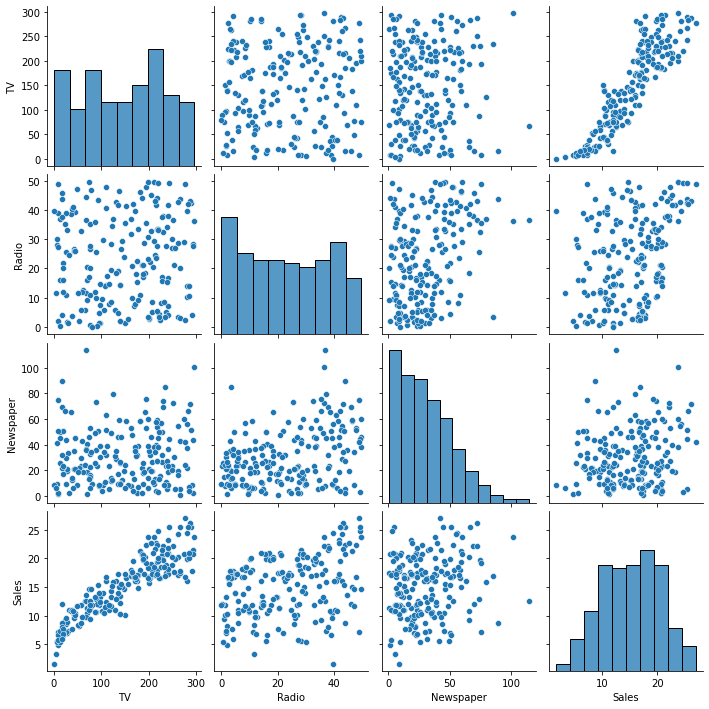

In [8]:
#Create pairplot using seaborn library
sns.pairplot(advertising)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

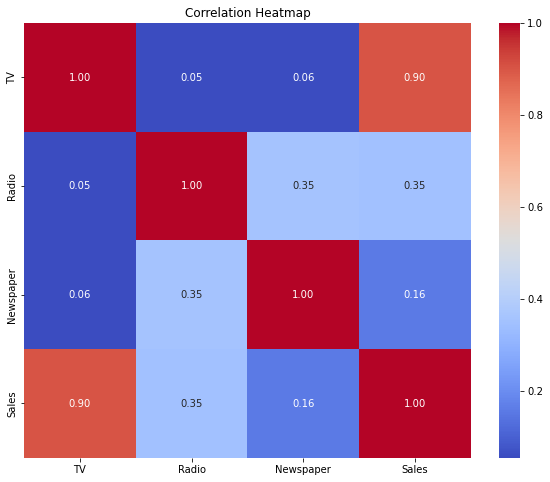

In [9]:
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(advertising.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

X = advertising['TV'] ,
y = advertising['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [10]:
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [11]:
X = advertising['TV'] 
y = advertising['Sales']

In [12]:
advertising.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
# Let's now take a look at the train dataset\

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
X_train

79     116.0
197    177.0
38      43.1
24      62.3
122    224.0
       ...  
106     25.0
14     204.1
92     217.7
179    165.6
102    280.2
Name: TV, Length: 160, dtype: float64

In [15]:
y_train

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [16]:
#import statsmodels.api as sm
import statsmodels.api as sm



By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [17]:
# Add a constant to get an intercept

X_train = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr= sm.OLS(y_train, X_train).fit()


In [18]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
intercept = lr.params['const']
slope = lr.params['TV']  # Assuming 'TV' is the predictor variable
print("Intercept:", intercept)
print("Slope:", slope)

Intercept: 7.007108428241844
Slope: 0.05548294393146319


In [19]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.1
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.71e-59
Time:                        10:30:17   Log-Likelihood:                -355.76
No. Observations:                 160   AIC:                             715.5
Df Residuals:                     158   BIC:                             721.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0071      0.364     19.274      0.0

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

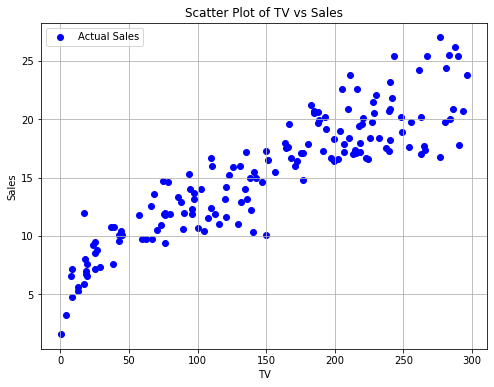

In [20]:
#Plot a scatter to view the sales parameter
plt.figure(figsize=(8, 6))
plt.scatter(X_train['TV'], y_train, color='blue', label='Actual Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Scatter Plot of TV vs Sales')
plt.legend()
plt.grid(True)
plt.show()

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [21]:
#Residual Analysis
y_train_pred = lr.predict(X_train)
res = (y_train - y_train_pred)
res

79    -2.443130
197   -2.027590
38     0.701577
24    -0.763696
122   -2.835288
         ...   
106   -1.194182
14     0.668823
92     0.314255
179    1.404916
102   -2.753429
Length: 160, dtype: float64

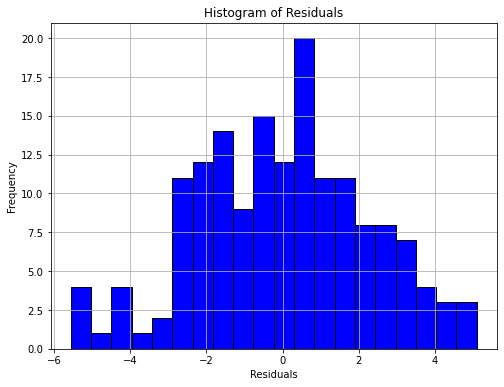

In [22]:
#Make a histrogram for error terms
plt.figure(figsize=(8, 6))
plt.hist(res, bins=20, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

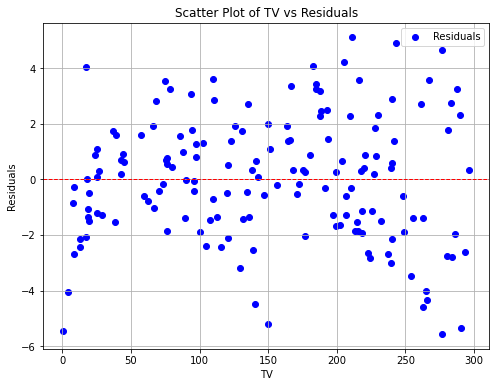

In [23]:
# Create a scatterplot for x_train and computed residual 
plt.figure(figsize=(8, 6))
plt.scatter(X_train['TV'], res, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Adding a horizontal line at y=0 for reference
plt.xlabel('TV')
plt.ylabel('Residuals')
plt.title('Scatter Plot of TV vs Residuals')
plt.legend()
plt.grid(True)
plt.show()


We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [25]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

In [26]:
# Check the first 5 rows 

y_test_pred.head(5)

95     16.067473
15     17.848476
30     23.258063
158     7.656259
128    19.230001
dtype: float64

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [28]:
#Returns the mean squared error; we'll take a square root
mse = mean_squared_error(y_test, y_test_pred)

# create the formul or import the function from the numpy library to calculate the RMSE
rmse = np.sqrt(mse)


###### Checking the R-squared on the test set

In [30]:
r2 = r2_score(y_test, y_test_pred)


##### Visualizing the fit on the test set

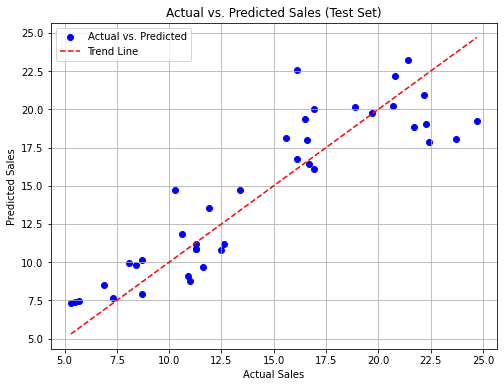

In [31]:
#Visualizing the fit on the test set using line trend line

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Trend Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [48]:
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
#Get Shape()
X_train_lm1 = X_train_lm.values.reshape(-1, 1)
X_test_lm1 = X_test_lm.values.reshape(-1, 1)


In [51]:
print(X_train_lm1.shape)
print(y_train_lm.shape)
print(X_test_lm1.shape)
print(y_test_lm.shape)

(160, 1)
(160,)
(40, 1)
(40,)


In [53]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)

lr1 = LinearRegression()

# Fit the model to the training data
lr1.fit(X_train_lm1, y_train_lm)


# Predict on the test data
y_test_pred_sklearn = lr1.predict(X_test_lm1)



In [54]:
# Printing the intercept and coefficients of the linear model
print("Intercept:", lr1.intercept_)
print("Coefficient:", lr1.coef_)


Intercept: 7.007108428241848
Coefficient: [0.05548294]


The equationwe get is the same as what we got before!

$ Sales = 6.948 + 0.054* TV $

Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)

---
## Addressing some common questions/doubts on Simple Linear Regression
---

### Q: Why is it called 'R-squared'?

Based on what we learnt so far, do you see it? Can you answer this?
 
 
 
 
 
 

.R-squared, also known as the coefficient of determination, measures the amount of variation in the dependent variable (such as sales) explained by the independent variables (such as TV, radio, and newspapers) in a linear regression model.

.A high R-squared value (near to 1) suggests that the model fits the data well, implying that the independent variables (TV, radio, newspaper) may explain a considerable percentage of the variance in the dependent variable (sales). A low R-squared value (near to zero) indicates that the model does not explain a significant portion of the variation in the dependent variable.
 
.A low R-squared value (near to zero) indicates that the model does not explain a significant portion of the variation in the dependent variable.R-squared is useful for assessing the goodness of fit of a regression model, particularly in determining how well the selected independent variables (TV, radio, newspaper) reflect the connection with the dependent variable (sales).

.While R-squared gives information about the model's explanatory power, it should be used in conjunction with other metrics and factors. A high R-squared does not imply that the model is correct or that the independent variables caused the observed changes in the dependent variable. Furthermore, R-squared may not be appropriate for comparing models with varying numbers of independent variables or evaluating predictive strength.
 
  #### Drumroll...
  
.
 
.

.

.

In [56]:
import numpy as np

# Compute the correlation coefficients
correlation_coefficients = np.corrcoef(X_train_lm, y_train)

# Print the correlation coefficients
print("Correlation coefficients between X_train and y_train:")
print(correlation_coefficients)


Correlation coefficients between X_train and y_train:
[[1.         0.90193492]
 [0.90193492 1.        ]]


In [59]:


# Compute the correlation coefficient between TV and Sales
correlation_coefficient_tv_sales = np.corrcoef(X_train_lm, y_train)[0, 1]

# Compute the squared correlation coefficient
squared_correlation_coefficient_tv_sales = correlation_coefficient_tv_sales ** 2

# Print the squared correlation coefficient
print("Squared correlation coefficient between TV and Sales:", squared_correlation_coefficient_tv_sales)


Squared correlation coefficient between TV and Sales: 0.8134866044709267


Correlation (Pearson) is also called **"r"** or **"Pearson's R"**

### Q: What is a good RMSE? Is there some RMSE that I should aim for?

<br>

<br>

You should be able to answer this by now!


<br>


<br>



Look at "Sharma ji ka beta"; he could answer this in a moment. How lucky is Sharma ji to have such a smart kid!

.

.
 
.

.
 
  #### Drumroll...
  
.
 
.

.

.

The RMSE:
 - depends on the units of the Y variables
 - is NOT a normalized measure
 
While it can't really tell you of the gooodness of the particular model, it can help you compare models. 

A better measure is R squared, which is normalized.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### Q: Does scaling have an impact on the model? When should I scale?

<br>
<br>
<br>
<br>
<br>
<br>

While the true benefits of scaling will be apparent during future modules, at this juncture we can discuss if it has an impact on the model.

We'll rebuild the model after scaling the predictor and see what changes.

The most popular methods for scaling:
1. Min-Max Scaling
2. Standard Scaling

In [ ]:
# Splitting the data into training and testing sets

#### SciKit Learn has these scaling utilities handy

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# One aspect that you need to take care of is that the 'fit_transform' can be performed on 2D arrays only. So you need to
# reshape your 'X_train_scaled' and 'y_trained_scaled' data in order to perform the standardisation.


In [ ]:
#Get x train shape

In [ ]:
# Create a scaler object using StandardScaler()

#'Fit' and transform the train set; and transform using the fit on the test set later


In [ ]:
# Printing mean and standard deviation for scaled training features

# Printing mean and standard deviation for scaled training target variable

In [ ]:
# Let's fit the regression line following exactly the same steps as done before


In [ ]:
# Check the parameters


As you might notice, the value of the parameters have changed since we have changed the scale.

Let's look at the statistics of the model, to see if any other aspect of the model has changed.

In [ ]:

# Assuming lr_scaled is your fitted linear regression model

#### Model statistics and goodness of fit remain unchanged.

##### So why scale at all?
- Helps with interpretation (we'll be able to appreciate this better in later modules)
- Faster convergence of gradient descent